In [1]:
import pandas as pd

In [4]:
test=pd.read_csv("submit.csv")

In [6]:
test.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [7]:
dataset=pd.read_csv("test.csv")

In [8]:
dataset.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [9]:
dataset.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [10]:
dataset.shape

(5200, 4)

In [11]:
dataset.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [12]:
test.shape

(5200, 2)

In [14]:
dataset.drop(["id"],axis=1,inplace=True)

In [15]:
test.drop(["id"],axis=1,inplace=True)

In [16]:
dataset.columns

Index(['title', 'author', 'text'], dtype='object')

In [17]:
test.columns

Index(['label'], dtype='object')

In [18]:
fn=pd.concat([test,dataset],axis=1)

In [19]:
fn.columns

Index(['label', 'title', 'author', 'text'], dtype='object')

In [20]:
fn.isnull().sum()

label       0
title     122
author    503
text        7
dtype: int64

In [22]:
fn.dropna(inplace=True)

In [23]:
fn.isnull().sum()

label     0
title     0
author    0
text      0
dtype: int64

In [24]:
fn.dtypes

label      int64
title     object
author    object
text      object
dtype: object

In [25]:
fn.head()

,label,title,author,text
0,0,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
2,0,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,1,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,1,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
6,1,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."


In [26]:
fn.shape

(4575, 4)

In [27]:
fn.reset_index(inplace=True)

In [28]:
fn.head()

,index,label,title,author,text
0,0,0,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,2,0,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
2,3,1,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
3,4,1,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
4,6,1,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(len(fn)):
    words=re.sub("[^a-zA-Z]"," ",fn['title'][i])
    words=re.sub("\d+"," ",words)
    words=words.lower()
    words=words.split()
    words=[ps.stem(word) for word in words if not word in stopwords.words('english')]
    words=" ".join(words)
    corpus.append(words)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))

In [61]:
x=cv.fit_transform(corpus).toarray()

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
y=fn["label"]

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [67]:
corpus

['pecter trump loosen tongues, purs strings, silicon valley - new york time',
 '#nodapl: nativ american leader vow stay winter, file lawsuit polic',
 'im tebow attempt anoth comeback, time basebal - new york time',
 'eiser report: meme war (e995)',
 'elosi call fbi investig find ’what russian donald trump’ - breitbart',
 'eekli featur profil – randi shannon',
 '184 u.s. gener admir endors trump commander-in-chief',
 '“work class hero” john brennon',
 'rise mandatori vaccin mean end medic freedom',
 'ommunist terror small busi',
 'omput programm come forward, admit paid rig vote booths! trump right! • usa newsflash',
 'hiev take chunk change, 221 pound it, berlin museum - new york time',
 'ew england patriots’ owner, still sore n.f.l., payback sight - new york time',
 'olleg republicans, yaf sue berkeley ann coulter event - breitbart',
 'rump melt accus us postal servic steal elect clinton',
 'isit madagascar? leav red swimsuit (and lemur recipes) home - new york time',
 'eese’ peanut b

In [68]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [69]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
model=MultinomialNB()

In [71]:
model.fit(x_train,y_train)

MultinomialNB()

In [72]:
model.score(x_test,y_test)

0.7737704918032787

In [73]:
y_predicted=model.predict(x_test)

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
cm=confusion_matrix(y_test,y_predicted)

In [76]:
import seaborn as sn

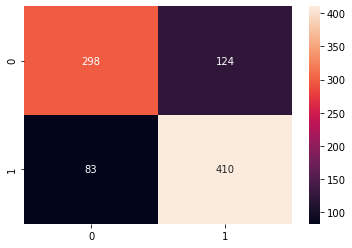

In [81]:
sn.heatmap(cm,annot=True,fmt='d')

In [79]:
y_test.shape

(915,)

In [84]:
sorted(zip(model.coef_[0],cv.get_feature_names()))[:200]

[(-9.926422523818625, '100 day'),
 (-9.926422523818625, '184'),
 (-9.926422523818625, '184 gener'),
 (-9.926422523818625, '184 gener admir'),
 (-9.926422523818625, '21 thing'),
 (-9.926422523818625, '21 thing we'),
 (-9.926422523818625, '22'),
 (-9.926422523818625, '25'),
 (-9.926422523818625, '400 000'),
 (-9.926422523818625, '600'),
 (-9.926422523818625, '87 new'),
 (-9.926422523818625, '87 new york'),
 (-9.926422523818625, 'abe'),
 (-9.926422523818625, 'access pipelin'),
 (-9.926422523818625, 'act check'),
 (-9.926422523818625, 'addict'),
 (-9.926422523818625, 'admir endors'),
 (-9.926422523818625, 'admir endors trump'),
 (-9.926422523818625, 'adult'),
 (-9.926422523818625, 'advoc'),
 (-9.926422523818625, 'affirm'),
 (-9.926422523818625, 'afford'),
 (-9.926422523818625, 'agre'),
 (-9.926422523818625, 'ahoo'),
 (-9.926422523818625, 'airbag'),
 (-9.926422523818625, 'al qaeda'),
 (-9.926422523818625, 'ali'),
 (-9.926422523818625, 'alifornia today'),
 (-9.926422523818625, 'american peop